In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [12]:
zcoord = 'rho0'
ds = xr.open_dataset('z/prog_'+zcoord+'.nc').mean(['yh','yq'])
ds

<xarray.Dataset> Size: 112kB
Dimensions:    (xh: 80, rho0_l: 19, rho0_i: 20, Time: 2, xq: 81)
Coordinates:
  * xh         (xh) float64 640B 5.0 15.0 25.0 35.0 ... 765.0 775.0 785.0 795.0
  * rho0_l     (rho0_l) float64 152B 1.034e+03 1.034e+03 ... 1.035e+03 1.035e+03
  * rho0_i     (rho0_i) float64 160B 1.034e+03 1.034e+03 ... 1.035e+03 1.035e+03
  * Time       (Time) object 16B 0001-01-01 06:00:00 0001-01-01 12:00:00
  * xq         (xq) float64 648B 0.0 10.0 20.0 30.0 ... 770.0 780.0 790.0 800.0
Data variables:
    temp       (Time, rho0_l, xh) float32 12kB 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0
    salt       (Time, rho0_l, xh) float32 12kB 35.0 35.0 35.0 ... 34.97 34.97
    u          (Time, rho0_l, xq) float32 12kB 0.0 -0.002137 ... 3.396e-05 0.0
    v          (Time, rho0_l, xh) float32 12kB 1.084e-14 ... -3.928e-15
    h          (Time, rho0_l, xh) float32 12kB 0.0 0.0 0.0 ... 210.5 210.5 210.5
    e          (Time, rho0_i, xh) float32 13kB 0.0 0.0 0.0 ... -4e+03 -4e+03
    rhopot0    (Time, rho0_l, xh) float32 12kB 1.035e+03 1.035e+03 ... 1.035e+03
    rhopot2    (Time, rho0_l, xh) float32 12kB 1.035e+03 1.035e+03 ... 1.035e+03
    rhoinsitu  (Time, rho0_l, xh) float32 12kB 1.035e+03 1.035e+03 ... 1.035e+03

In [13]:
tmp = 0.5*(ds['e'].isel({zcoord+'_i':slice(0,-1)}).values + ds['e'].isel({zcoord+'_i':slice(1,None)}).values)
ds['eh'] = ds['temp'].copy(data=tmp)
# ds['eh'] = ds['eh'].where(np.isfinite(ds['eh']),ds['eh'].min(zcoord+'_l'))

/var/folders/89/8wbtnb1d5y30tjpcqtlr5f840000gq/T/ipykernel_18491/2478410361.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,e,s)


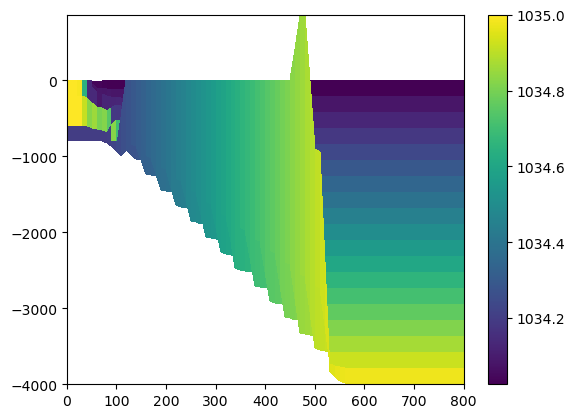

In [14]:
t = -1
dsnow = ds.isel(Time=t)
e = dsnow['eh']
# e = e.where(np.isfinite(e),0)
s = dsnow['rhopot0']
x = dsnow['xh']#(dsnow['xh']*xr.ones_like(ds[zcoord+'_l'])).values
plt.pcolormesh(x,e,s)
plt.colorbar()

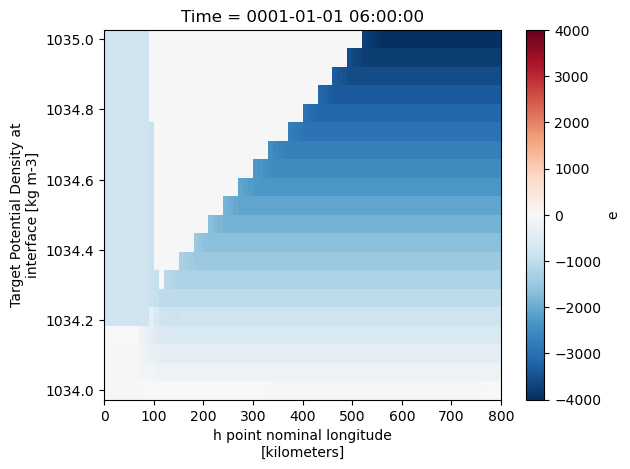

In [20]:
ds['e'].isel(Time=0).plot()

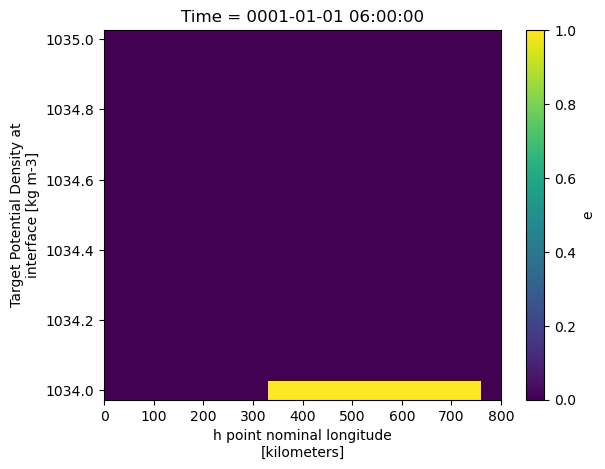

In [22]:
(ds['e'].isel(Time=0)>0).plot()